In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Observation :
1. The data set includes figures on 48,842 different records and 14 attributes for 42 nations. The 14 attributes consist of 8 categorical and 6 continuous attributes containing information on age, education, nationality, marital status, relationship status, occupation, work classification, gender, race,working hours per week, capital loss and capital gain as shown in above.
2. The binomial label in the data set is the income level which predicts whether a person earns more than 50 Thousand Dollars per year or not based on the given set of attributes.

### Summary Statistics of Numerical Features  :

In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [6]:
# let's drop'fnlwgt' feature as it is not useful in our analysis
df.drop(['fnlwgt'],axis=1,inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# total numbers of ? present in each row
df.isin(['?']).sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
#replacing ? with nan values
df.replace('?', np.nan , inplace=True)

In [9]:
df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df.shape

(48842, 14)

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(45222, 14)

In [13]:
# let's Divide these data set into categorical and numerical
numerical=df[['age','educational-num','capital-gain','capital-loss','hours-per-week']]
categorical=df.loc[:,~df.columns.isin(numerical)]

### Univariate Analysis  & Bivariate Analysis

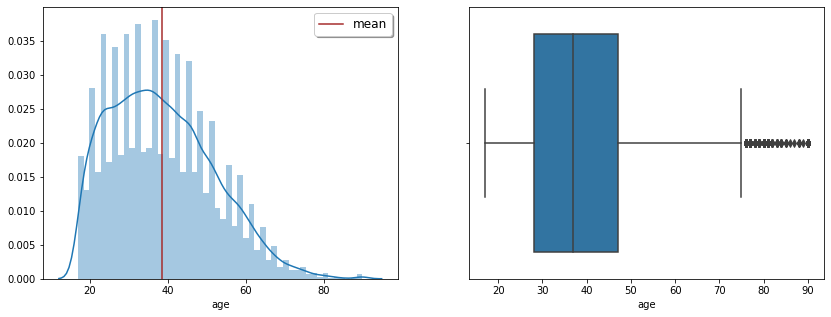

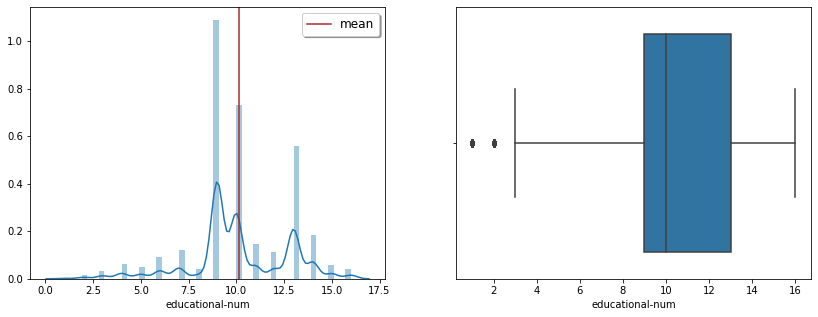

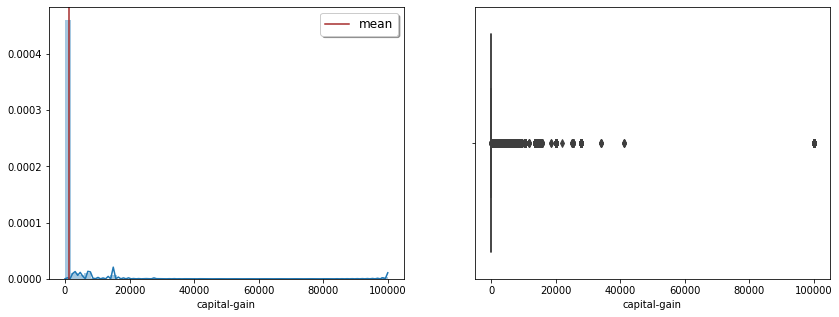

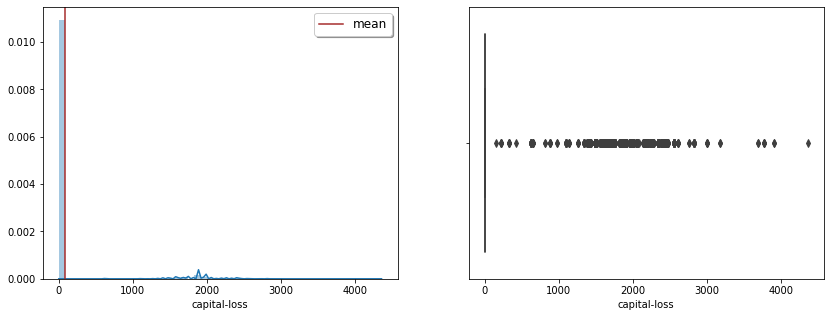

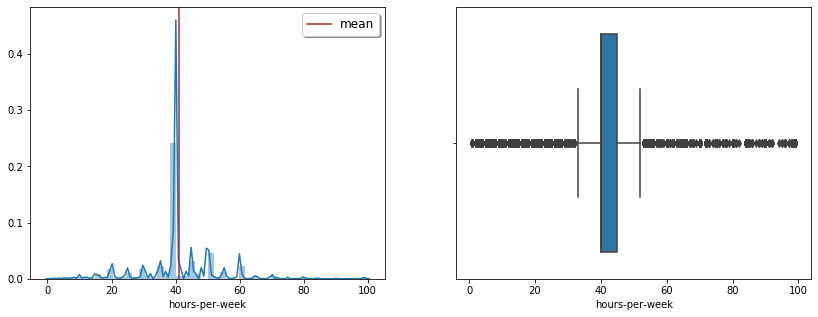

In [14]:
#Data Visualization has been done using distribution Box and Whisker Plots of all continuous features to clearly understand the measures of their central tendencies 
for col in numerical.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.distplot(numerical[col])
    plt.axvline(numerical[col].mean(),color='brown',label='mean')
    plt.legend(shadow=True,fontsize='larger')
    
    plt.subplot(122)
    sns.boxplot(numerical[col])
    

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

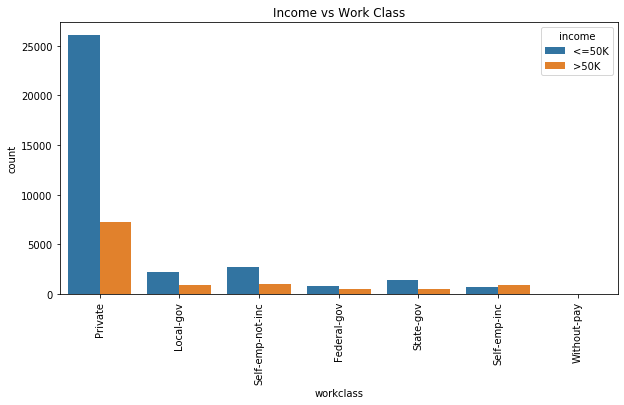

In [15]:
plt.figure(figsize=(10,5))
sns.countplot( data = df, x='workclass', hue='income')
plt.title('Income vs Work Class')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

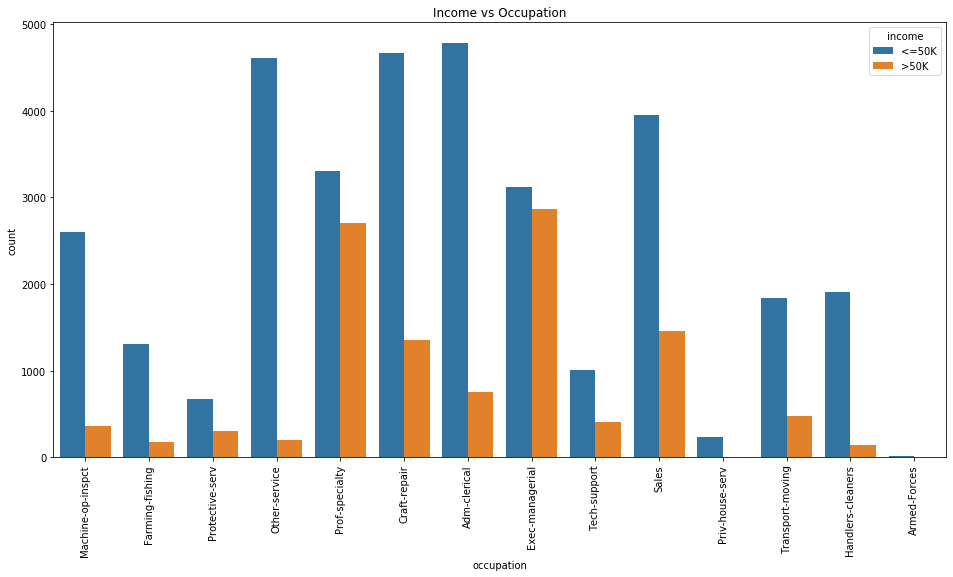

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(data = df,x='occupation', hue='income')
plt.title('Income vs Occupation')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

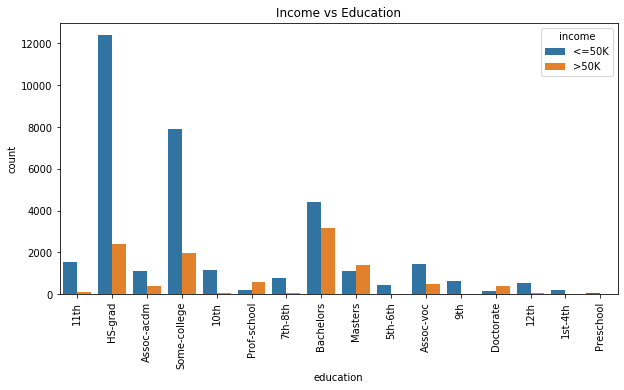

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,x='education', hue='income')
plt.title('Income vs Education')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

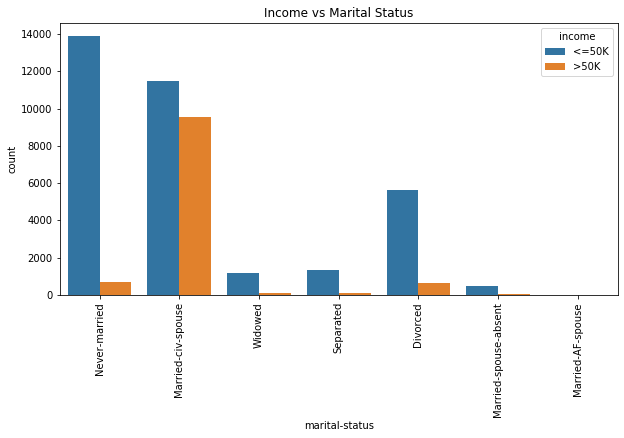

In [18]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = df,x='marital-status', hue='income')
plt.title('Income vs Marital Status')
plt.xticks(rotation = 90)

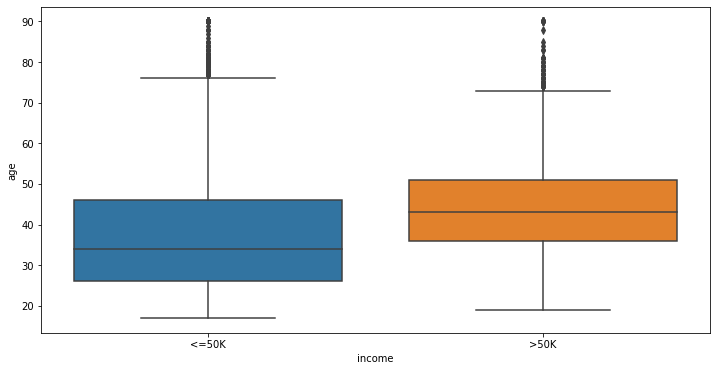

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

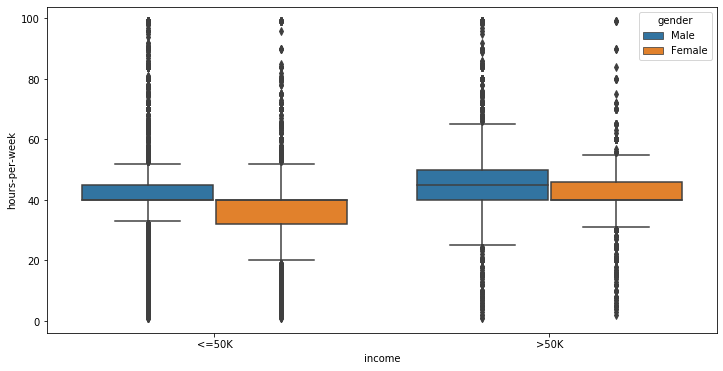

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='gender')

In [21]:
numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [22]:
# drop rows with age 90

numerical.drop(numerical[numerical['age'] == 90].index, axis = 0, inplace =True)
numerical.shape

(45176, 5)

In [23]:
numerical.drop(labels = df[df['capital-gain'] == 99999].index, axis = 0, inplace =True)


## Preparing the data for modeling

In [24]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
            'Never-married','Separated','Widowed'],
            ['not married','married','married','married','not married','not married','not married'], 
            inplace = True)

df.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov',
                'Without-pay', 'Never-worked'],
                ['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked'], 
                inplace = True)

df.replace(['<=50K','>50K'],[0,1], inplace=True)

In [25]:
categorical = df.select_dtypes(include='object')

In [26]:
for i in categorical.columns:
    print()
    print(i)

    print('_'*30)
    print()
    print(categorical[i].value_counts())


workclass
______________________________

Private        33307
gov             6452
inc             5442
Without-pay       21
Name: workclass, dtype: int64

education
______________________________

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

marital-status
______________________________

not married    23583
married        21639
Name: marital-status, dtype: int64

occupation
______________________________

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing

In [27]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
categorical_label=categorical.apply(LabelEncoder().fit_transform)

categorical_label.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,0,1,1,6,3,2,1,38
1,0,11,0,4,0,4,1,38
2,2,7,0,10,0,4,1,38
3,0,15,0,6,0,2,1,38
5,0,0,1,7,1,4,1,38


In [28]:
numerical = df.select_dtypes(exclude='object')

In [29]:
df1=pd.concat([categorical_label,numerical], axis=1, join='inner')
df1.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0,1,1,6,3,2,1,38,25,7,0,0,40,0
1,0,11,0,4,0,4,1,38,38,9,0,0,50,0
2,2,7,0,10,0,4,1,38,28,12,0,0,40,1
3,0,15,0,6,0,2,1,38,44,10,7688,0,40,1
5,0,0,1,7,1,4,1,38,34,6,0,0,30,0


In [30]:
df1.shape

(45222, 14)

In [31]:
x=df1.drop(['income'],axis=1)
y=df1.income

In [32]:
x

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0,1,1,6,3,2,1,38,25,7,0,0,40
1,0,11,0,4,0,4,1,38,38,9,0,0,50
2,2,7,0,10,0,4,1,38,28,12,0,0,40
3,0,15,0,6,0,2,1,38,44,10,7688,0,40
5,0,0,1,7,1,4,1,38,34,6,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,7,0,12,5,4,0,38,27,12,0,0,38
48838,0,11,0,6,0,4,1,38,40,9,0,0,40
48839,0,11,1,0,4,4,0,38,58,9,0,0,40
48840,0,11,1,0,3,4,1,38,22,9,0,0,20


In [33]:
y[:5]

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64

In [34]:
from sklearn.preprocessing import Normalizer
n=Normalizer()
data=n.fit_transform(x)

In [35]:
data[:5]

array([[0.00000000e+00, 1.62865585e-02, 1.62865585e-02, 9.77193513e-02,
        4.88596756e-02, 3.25731171e-02, 1.62865585e-02, 6.18889225e-01,
        4.07163964e-01, 1.14005910e-01, 0.00000000e+00, 0.00000000e+00,
        6.51462342e-01],
       [0.00000000e+00, 1.46692748e-01, 0.00000000e+00, 5.33428173e-02,
        0.00000000e+00, 5.33428173e-02, 1.33357043e-02, 5.06756765e-01,
        5.06756765e-01, 1.20021339e-01, 0.00000000e+00, 0.00000000e+00,
        6.66785217e-01],
       [3.10759882e-02, 1.08765959e-01, 0.00000000e+00, 1.55379941e-01,
        0.00000000e+00, 6.21519765e-02, 1.55379941e-02, 5.90443777e-01,
        4.35063835e-01, 1.86455929e-01, 0.00000000e+00, 0.00000000e+00,
        6.21519765e-01],
       [0.00000000e+00, 1.95100438e-03, 0.00000000e+00, 7.80401752e-04,
        0.00000000e+00, 2.60133917e-04, 1.30066959e-04, 4.94254443e-03,
        5.72294618e-03, 1.30066959e-03, 9.99954779e-01, 0.00000000e+00,
        5.20267835e-03],
       [0.00000000e+00, 0.00000000e+

In [36]:
X=pd.DataFrame(data=data , columns=x.columns)
X.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.000000,0.016287,0.016287,0.097719,0.048860,0.032573,0.016287,0.618889,0.407164,0.114006,0.000000,0.0,0.651462
1,0.000000,0.146693,0.000000,0.053343,0.000000,0.053343,0.013336,0.506757,0.506757,0.120021,0.000000,0.0,0.666785
2,0.031076,0.108766,0.000000,0.155380,0.000000,0.062152,0.015538,0.590444,0.435064,0.186456,0.000000,0.0,0.621520
3,0.000000,0.001951,0.000000,0.000780,0.000000,0.000260,0.000130,0.004943,0.005723,0.001301,0.999955,0.0,0.005203
4,0.000000,0.000000,0.016657,0.116602,0.016657,0.066630,0.016657,0.632982,0.566352,0.099944,0.000000,0.0,0.499722


In [37]:
#features selection. 
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)



In [38]:
df2= {
    "column_name" : X.columns,
    "features_score" : feature_importance_normalized

}

df_new=pd.DataFrame(df2)
df_new

,column_name,features_score
0,workclass,0.002277
1,education,0.004868
2,marital-status,0.075083
3,occupation,0.011747
4,relationship,0.052189
5,race,0.025713
6,gender,0.030999
7,native-country,0.020707
8,age,0.033094
9,educational-num,0.007102


In [39]:
df_new_feature=df_new[df_new['features_score'] > 0.01]
df_new_feature

,column_name,features_score
2,marital-status,0.075083
3,occupation,0.011747
4,relationship,0.052189
5,race,0.025713
6,gender,0.030999
7,native-country,0.020707
8,age,0.033094
10,capital-gain,0.013340
12,hours-per-week,0.038843


In [40]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36177, 13), (9045, 13), (36177,), (9045,))

## Applying the Machine Learning Models

##  Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(X_train, y_train)

y_pred_logistic = Logistic_model.predict(X_test)

from sklearn import metrics

Logistic_Acc= round(metrics.accuracy_score(y_test, y_pred_logistic),2)*100

Logistic_Acc

78.0

## DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion='entropy',random_state=0)

DTC_model.fit(X_train,y_train)

y_pred_DTC = DTC_model.predict(X_test)

DTC_Acc = round(metrics.accuracy_score(y_test, y_pred_DTC),2)*100

DTC_Acc

82.0

## KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,y_train)

y_pred_knn=knn_model.predict(X_test)

Knn_Acc = round(knn_model.score(X_test,y_test),2)*100

Knn_Acc

81.0

## Random Forest Classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

y_pred_RF = RF_model.predict(X_test)

RF_Acc = round(RF_model.score(X_test,y_test),2)*100

RF_Acc

85.0

## ExtraTrees Classifier

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

ETC_model.fit(X_train, y_train)

y_pred_ETC = ETC_model.predict(X_test)

ETC_Acc = round(ETC_model.score(X_test,y_test),2)*100

ETC_Acc

84.0

## Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state = 0)

GBC_model.fit(X_train, y_train)

GBC_Acc = round(GBC_model.score(X_test,y_test),2)*100

GBC_Acc

86.0

## Performance of each Model

In [48]:
models = {
    'Logistic Regression':Logistic_Acc,
    'DecisionTreeClassifier':DTC_Acc,
    'KNeighborsClassifier':Knn_Acc,
    'RandomForestClassifier':RF_Acc,
    'ExtraTreesClassifier':ETC_Acc,
    'GradientBoostingClassifier':GBC_Acc,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Score'])

models_score.sort_values(by='Score', ascending=False)

,Score
GradientBoostingClassifier,86.0
RandomForestClassifier,85.0
ExtraTreesClassifier,84.0
DecisionTreeClassifier,82.0
KNeighborsClassifier,81.0
Logistic Regression,78.0


## Conclusion:
* We can conclude that GradientBoostingClassifier works best